<a href="https://colab.research.google.com/github/Pedro-Boechat/trainee/blob/main/periodo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um Perceptron é a unidade mais simples de rede neural existente. Ele é dividido em camadas: uma camada de input, que recebe os dados do usuário, camadas ocultas, conhecidas por hidden layers, e uma camada de output, a qual mostra o resultado do algoritmo.

O aprendizado do Perceptron se dá em duas fases: Forward e Backward Propagation:

Na fase de Forward Propagation, cada neurônio recebe os valores de cada um dos neurônios da camada anterior, multiplicados por seus respectivos pesos, e depois somados entre si. Depois desse passo, é usada uma função de ativação: isto é, aplica-se o resultado da soma pesada em uma função não-linear. A importância da função não-linear se mostra essencial para o aprendizado de máquina sobre questões mais complexas.

Esse processo é iterado para todos os neurônios de todas as camadas seguintes, até que a última camada exprima o resultado do algoritmo.

Este resultado final é passado por uma função de custo, a qual deve ser a mínima possível, indicando que a rede neural tem um bom índice de acertos. No entanto, para que a função de custo seja a mínima possível, é necessário aplicar a descida de gradiente, a qual será explicada durante o backward propagation.

O aprendizado, propriamente dito, se dá na fase de backward propagation, quando os pesos e bias são atualizados de acordo com as suas respectivas derivadas em relação ao custo da função. A partir da derivada dos parâmetros em relação ao custo, a atualização de cada um deles é feita da seguinte forma:

Parâmetro atualizado = Parâmetro ** derivada ** learning rate

O learning rate é um número de 0 a 1 que indica a velocidade com a qual os parâmetros se deslocarão em direção ao mínimo. Este valor deve ser alvo de testes, visto que ele é relevante para a descida de gradiente.


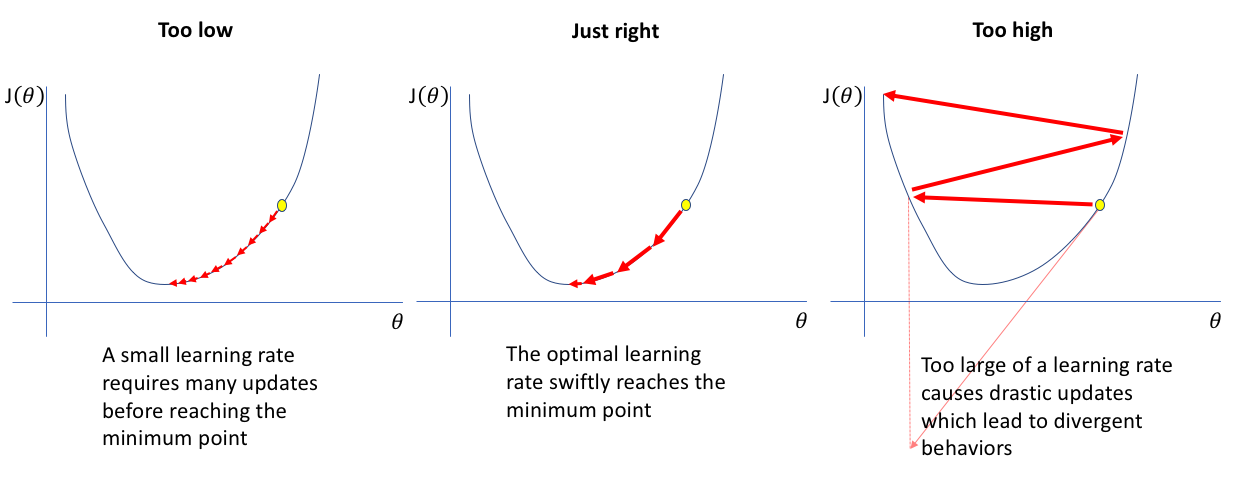

Feitos estes passos para cada um dos pesos e bias, o processo de forward propagation se repete, mas com outra amostra de treinamento.

O processo da realização de um loop a cada amostra de treinamento é referido como "época". Durante o treinamento de uma rede neural, mais de uma época é iterada.

Abaixo está uma imagem representando o funcionamento do Perceptron

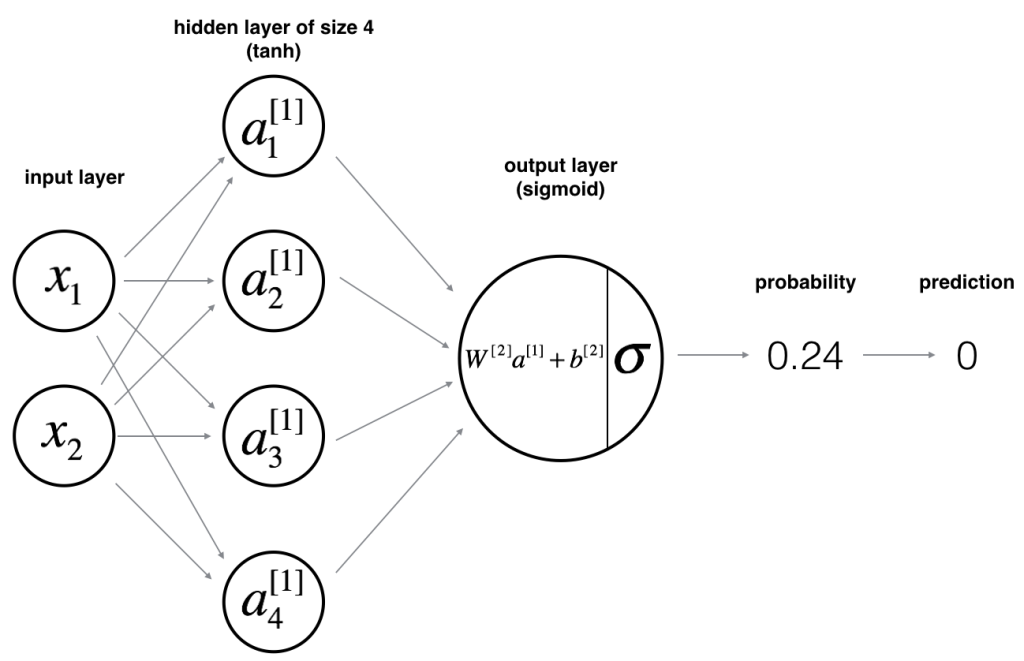

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import time
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.model_selection import train_test_split
import random


# Código

In [73]:
df = pd.read_csv('/content/creditcard.csv')

## Normalizar

Para normalizar o dataset, será usado este código

In [14]:
colunas = df.columns

In [15]:
for i in colunas:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Verificar balanceamento

In [74]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Verifica-se grande desbalanceamento no dataset

# O código do Perceptron

In [20]:
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None): # Caso o perceptron seja inicializado sem especificar os parametros:
            self.inputLayer = 30                       # Camada de Input
            self.hiddenLayer = 10                       # Camadas Ocultas
            self.OutputLayer = 2                       # Camadas de Output
            self.learningRate = 0.005                  # Taxa de aprendizado
            self.max_epochs = 600                      # Épocas
            self.BiasHiddenValue = -1                   # Bias das Camadas Ocultas
            self.BiasOutputValue = -1                  # Bias da Camada de Output
            self.activation = self.ativacao['sigmoid'] # Função de Ativação
            self.deriv = self.derivada['sigmoid']      # Derivada Função de Ativação
        else: # Caso seja inicializado identificando os parametros por meio de um dicionario. Isso foi feito neste relatório.
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        #Iniciando pesos e bias aleatoriamente
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 2
        
    pass
    
    def starting_weights(self, x, y): # Inicializando os pesos aleatoriamente
        return [[np.random.normal() for i in range(x)] for j in range(y)]
# Funções de ativação utilizadas nestes testes:
    ativacao = { 
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        # Erro: OutputLayer
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        # Atualizando pesos da OutputLayer e HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        # Erro: HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        # Atualizando pesos da HiddenLayer e InputLayer(x)
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                

    def predict(self, X, y): # Aqui houve problema explicitado na seção NOTA ao final do relatório
        # Fazendo a predicao para cada X
        my_predictions = []
        for idx, inputs in enumerate(X): 

                # Forward
            self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
            self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))

                #One-Hot
            if(max(self.OUTPUT_L2) == self.OUTPUT_L2[0]): 
                my_predictions.append(0)
            else:
                my_predictions.append(1)
   
        array_score = []
        print(my_predictions)
        mp = len(my_predictions)
        print(mp)
        for i in range(mp):
          if my_predictions[i] == 0: 
                array_score.append([i, 'Não fraudulento', my_predictions[i], y[i]])
          elif my_predictions[i] == 1:
                array_score.append([i, 'Fraudulento', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])

        return my_predictions, dataframe



    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                
                # Forward
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
           
                #One-Hot
                if(y[idx] == 0): 
                    self.output = np.array([1,0]) 
                elif(y[idx] == 1):
                    self.output = np.array([0,1]) 
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                # Backpropagation 
                self.Backpropagation_Algorithm(inputs)
                # Verificar o aprendizado do algoritmo
            total_error = (total_error / n)
            if((count_epoch % 10 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total error: ",total_error, f'\n Accuracy: {round((1-total_error)*100,2)}%')
                error_array.append(total_error)
                epoch_array.append(count_epoch)



                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1

        return self

## Treinando o perceptron

Neste relatório, serão feitos treinamentos do algoritmo com diferentes funções de ativação e diferentes parâmetros. Posteriormente, serão avaliados os desempenhos de cada resultado para obter uma conclusão acerca da melhor abordagem do Perceptron para o problema.

### Treinando com Sigmoid

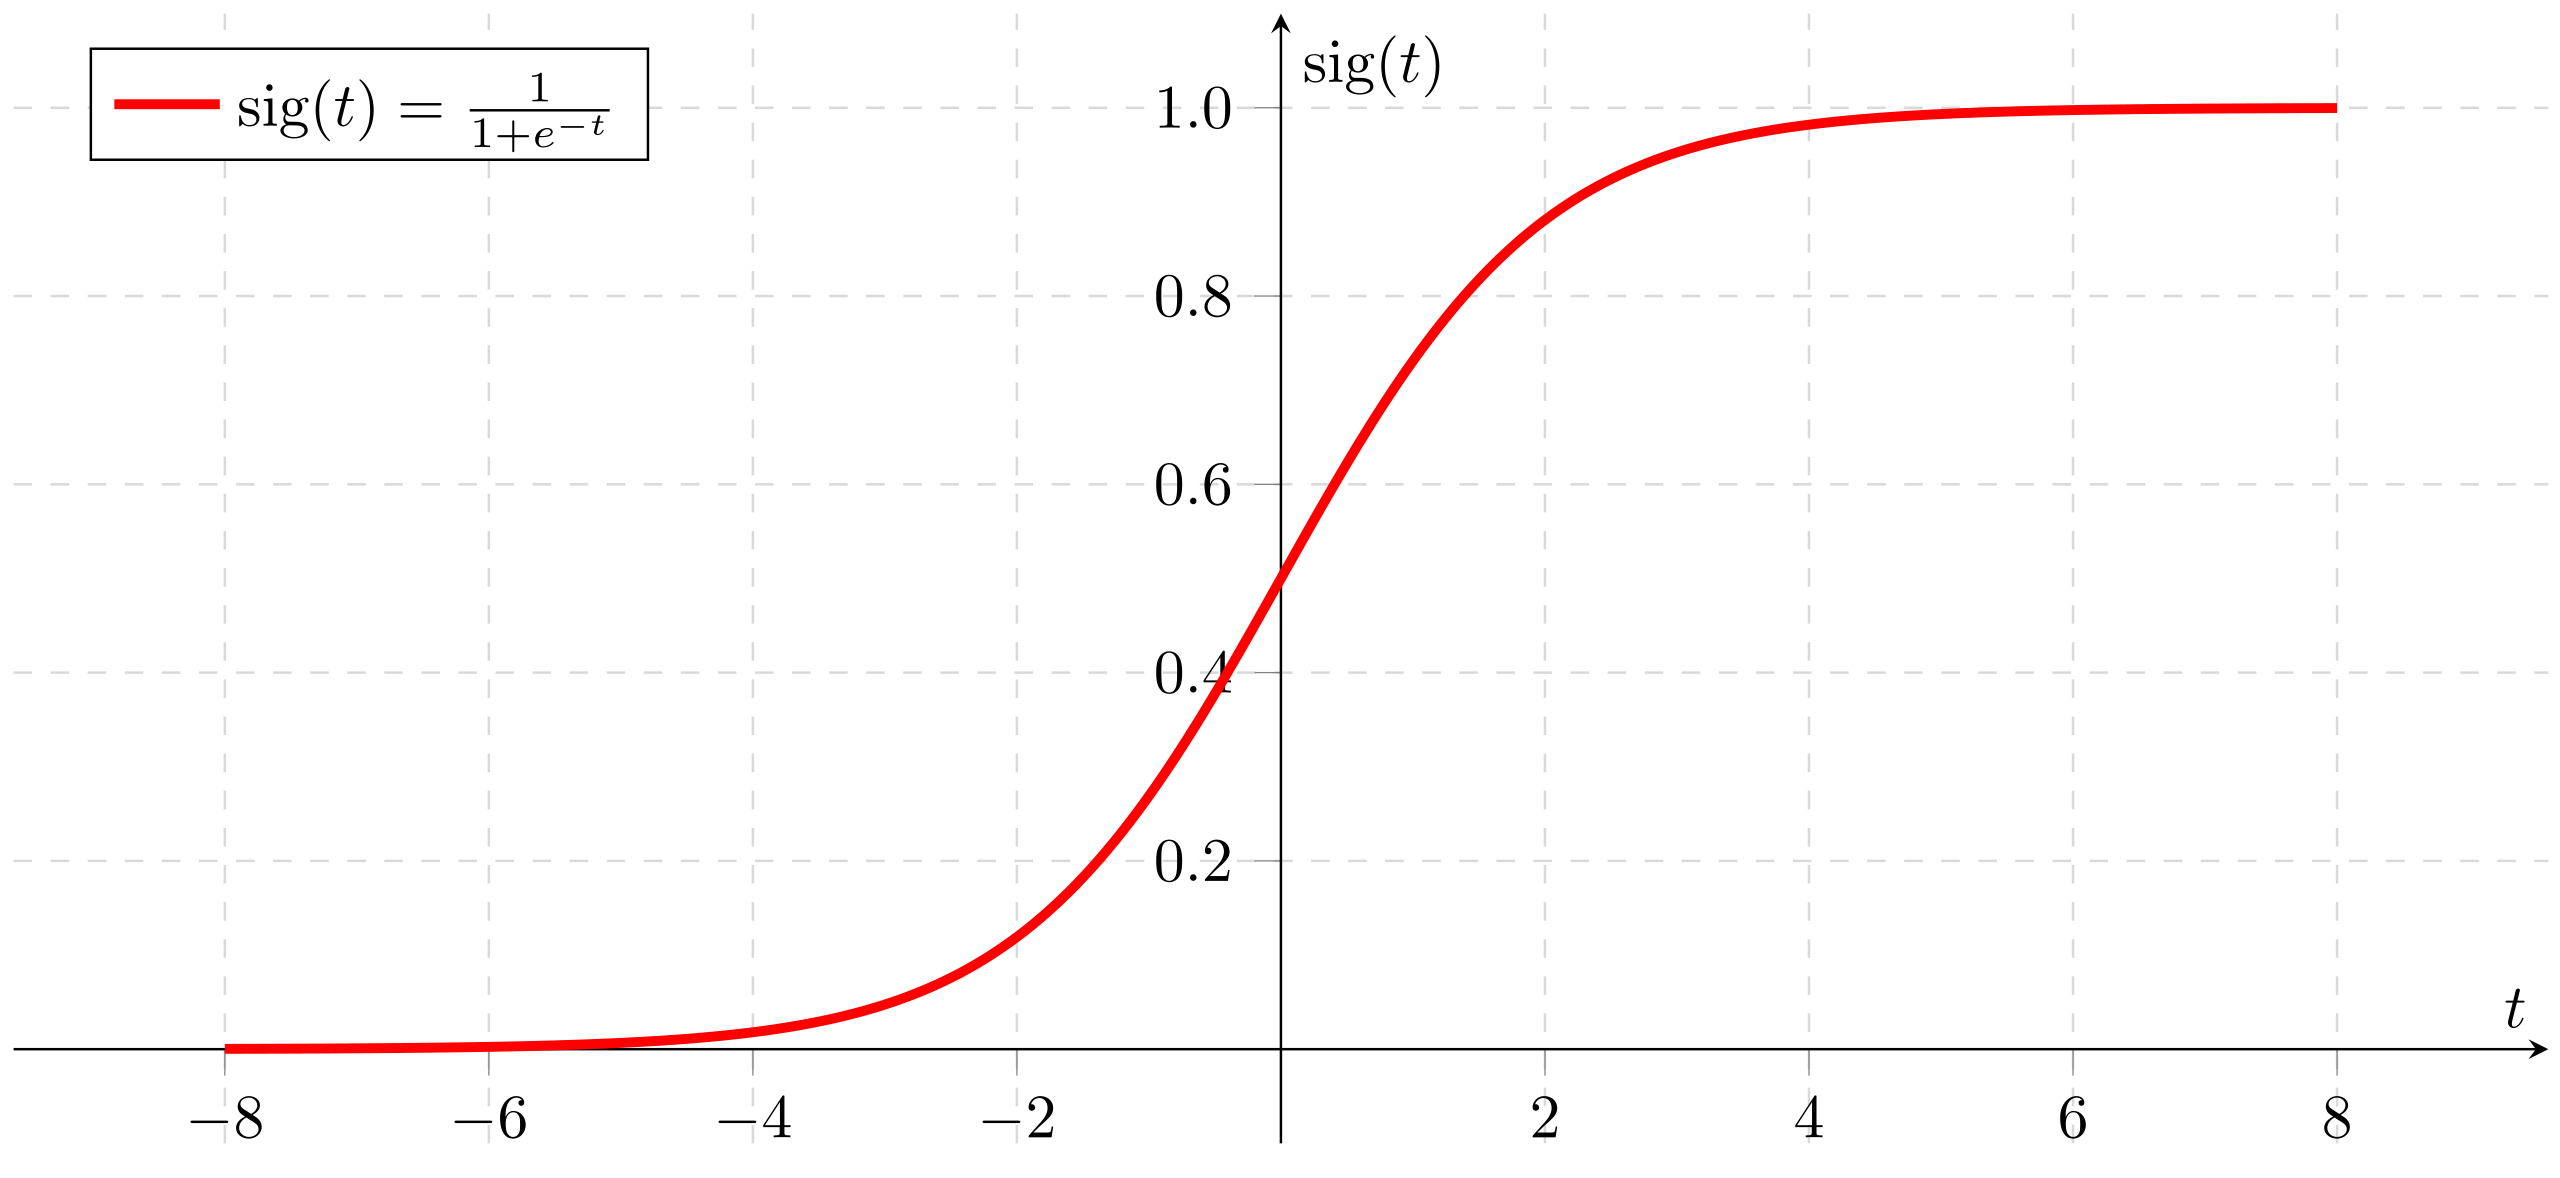

Esta função se mostra útil em classificações binárias (que é o caso deste projeto), uma vez que, se seu resultado for maior ou igual a 0.5, classifca-se a amostra com o valor 1. Caso contrário, ela é classificada com o valor 0.

A seguir, serão usados os seguintes parâmetros:

- 10 hidden layers

- 0.05 Learning rate

- 50 épocas

- Undersample

- Sem normalização

In [ ]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.042718089873202324 
 Accuracy: 95.73%
Epoch  10 - Total error:  0.03845038658200578 
 Accuracy: 96.15%
Epoch  20 - Total error:  0.038447463898619694 
 Accuracy: 96.16%
Epoch  30 - Total error:  0.03844471717443764 
 Accuracy: 96.16%
Epoch  40 - Total error:  0.03844214352492987 
 Accuracy: 96.16%
Epoch  50 - Total error:  0.03843973803110467 
 Accuracy: 96.16%


Nota-se que o algoritmo encontrou seu mínimo local em por volta de 10 a 20 épocas.

#### Agora efetuando o teste com o banco normalizado:

In [ ]:
for i in colunas:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [ ]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.03675139066917763 
 Accuracy: 96.32%
Epoch  10 - Total error:  0.02220340909999073 
 Accuracy: 97.78%
Epoch  20 - Total error:  0.017437942911528257 
 Accuracy: 98.26%
Epoch  30 - Total error:  0.015416078851278023 
 Accuracy: 98.46%
Epoch  40 - Total error:  0.014209750982640138 
 Accuracy: 98.58%
Epoch  50 - Total error:  0.01343727180456428 
 Accuracy: 98.66%


Conclui-se que a normalização dos dados afeta significativamente a acurácia do modelo de forma positiva. Percebe-se aumento de cerca de 2,5%.

#### Verificando o algoritmo usando learning rates maiores ou menores, mantendo a regularização:

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.15,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.035439221634521324 
 Accuracy: 96.46%
Epoch  10 - Total error:  0.016229100353917617 
 Accuracy: 98.38%
Epoch  20 - Total error:  0.015116204883440967 
 Accuracy: 98.49%
Epoch  30 - Total error:  0.01485123492817284 
 Accuracy: 98.51%
Epoch  40 - Total error:  0.014748851398763384 
 Accuracy: 98.53%
Epoch  50 - Total error:  0.014695810456451592 
 Accuracy: 98.53%


Verifica-se maior aumento de accuracy nas primeiras épocas do treinamento, embora ambos os modelos atinjam accuracies semelhantes após 50 épocas. Caso seja necessário que o modelo seja rodado em poucas épocas, seria melhor utilizar um learning rate como o deste exemplo (0.15).

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.01,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.04201154383728155 
 Accuracy: 95.8%
Epoch  10 - Total error:  0.030661596993249298 
 Accuracy: 96.93%
Epoch  20 - Total error:  0.027104627656197068 
 Accuracy: 97.29%
Epoch  30 - Total error:  0.025161326398247124 
 Accuracy: 97.48%
Epoch  40 - Total error:  0.02382745419216456 
 Accuracy: 97.62%
Epoch  50 - Total error:  0.022819480314238468 
 Accuracy: 97.72%


Observa-se maior lentidão para alcançar o mínimo local ao usar um learning rate menor (0.01). Será necessário usar mais épocas para atingi-lo, o que implica em maior gasto computacional.

#### Com oversample

In [ ]:
from sklearn.utils import resample
# Separar a maioria e minoria
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]
# Downsample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=25000) # Colocar aqui o downsample que quiser

df_minority_oversampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=25000) 

# Combinar a maioria downsampled com a minoria
df = pd.concat([df_majority_downsampled, df_minority_oversampled])

In [ ]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.019592245164919146 
 Accuracy: 98.04%
Epoch  10 - Total error:  0.012525340797452439 
 Accuracy: 98.75%
Epoch  20 - Total error:  0.010118151934739122 
 Accuracy: 98.99%
Epoch  30 - Total error:  0.009891642184450527 
 Accuracy: 99.01%
Epoch  40 - Total error:  0.009868691805737306 
 Accuracy: 99.01%
Epoch  50 - Total error:  0.009862057713743202 
 Accuracy: 99.01%


Observou-se ganho considerável de acurácia fazendo oversample, embora seja possível que isso se deva a um overfit. Infelizmente não foi possível verificar a ocorrência desse fenômeno pelo motivo explicado na Seção "NOTA", ao final do relatório.

## Relu

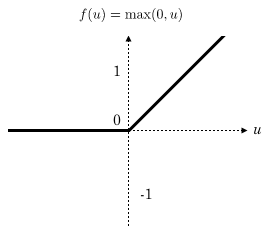

A função ReLU é apontada atualmente como uma das mais versáteis, uma vez que apresenta melhores resultados em diversos treinamentos, mostrando-se mais eficaz do que a sigmoide com frequência.

No entanto, vale ressaltar que ela não pode ser utilizada como função de ativação em classificação binária, uma vez que ela não é compatível com este tipo de classificação

## Tangente hiperbólica

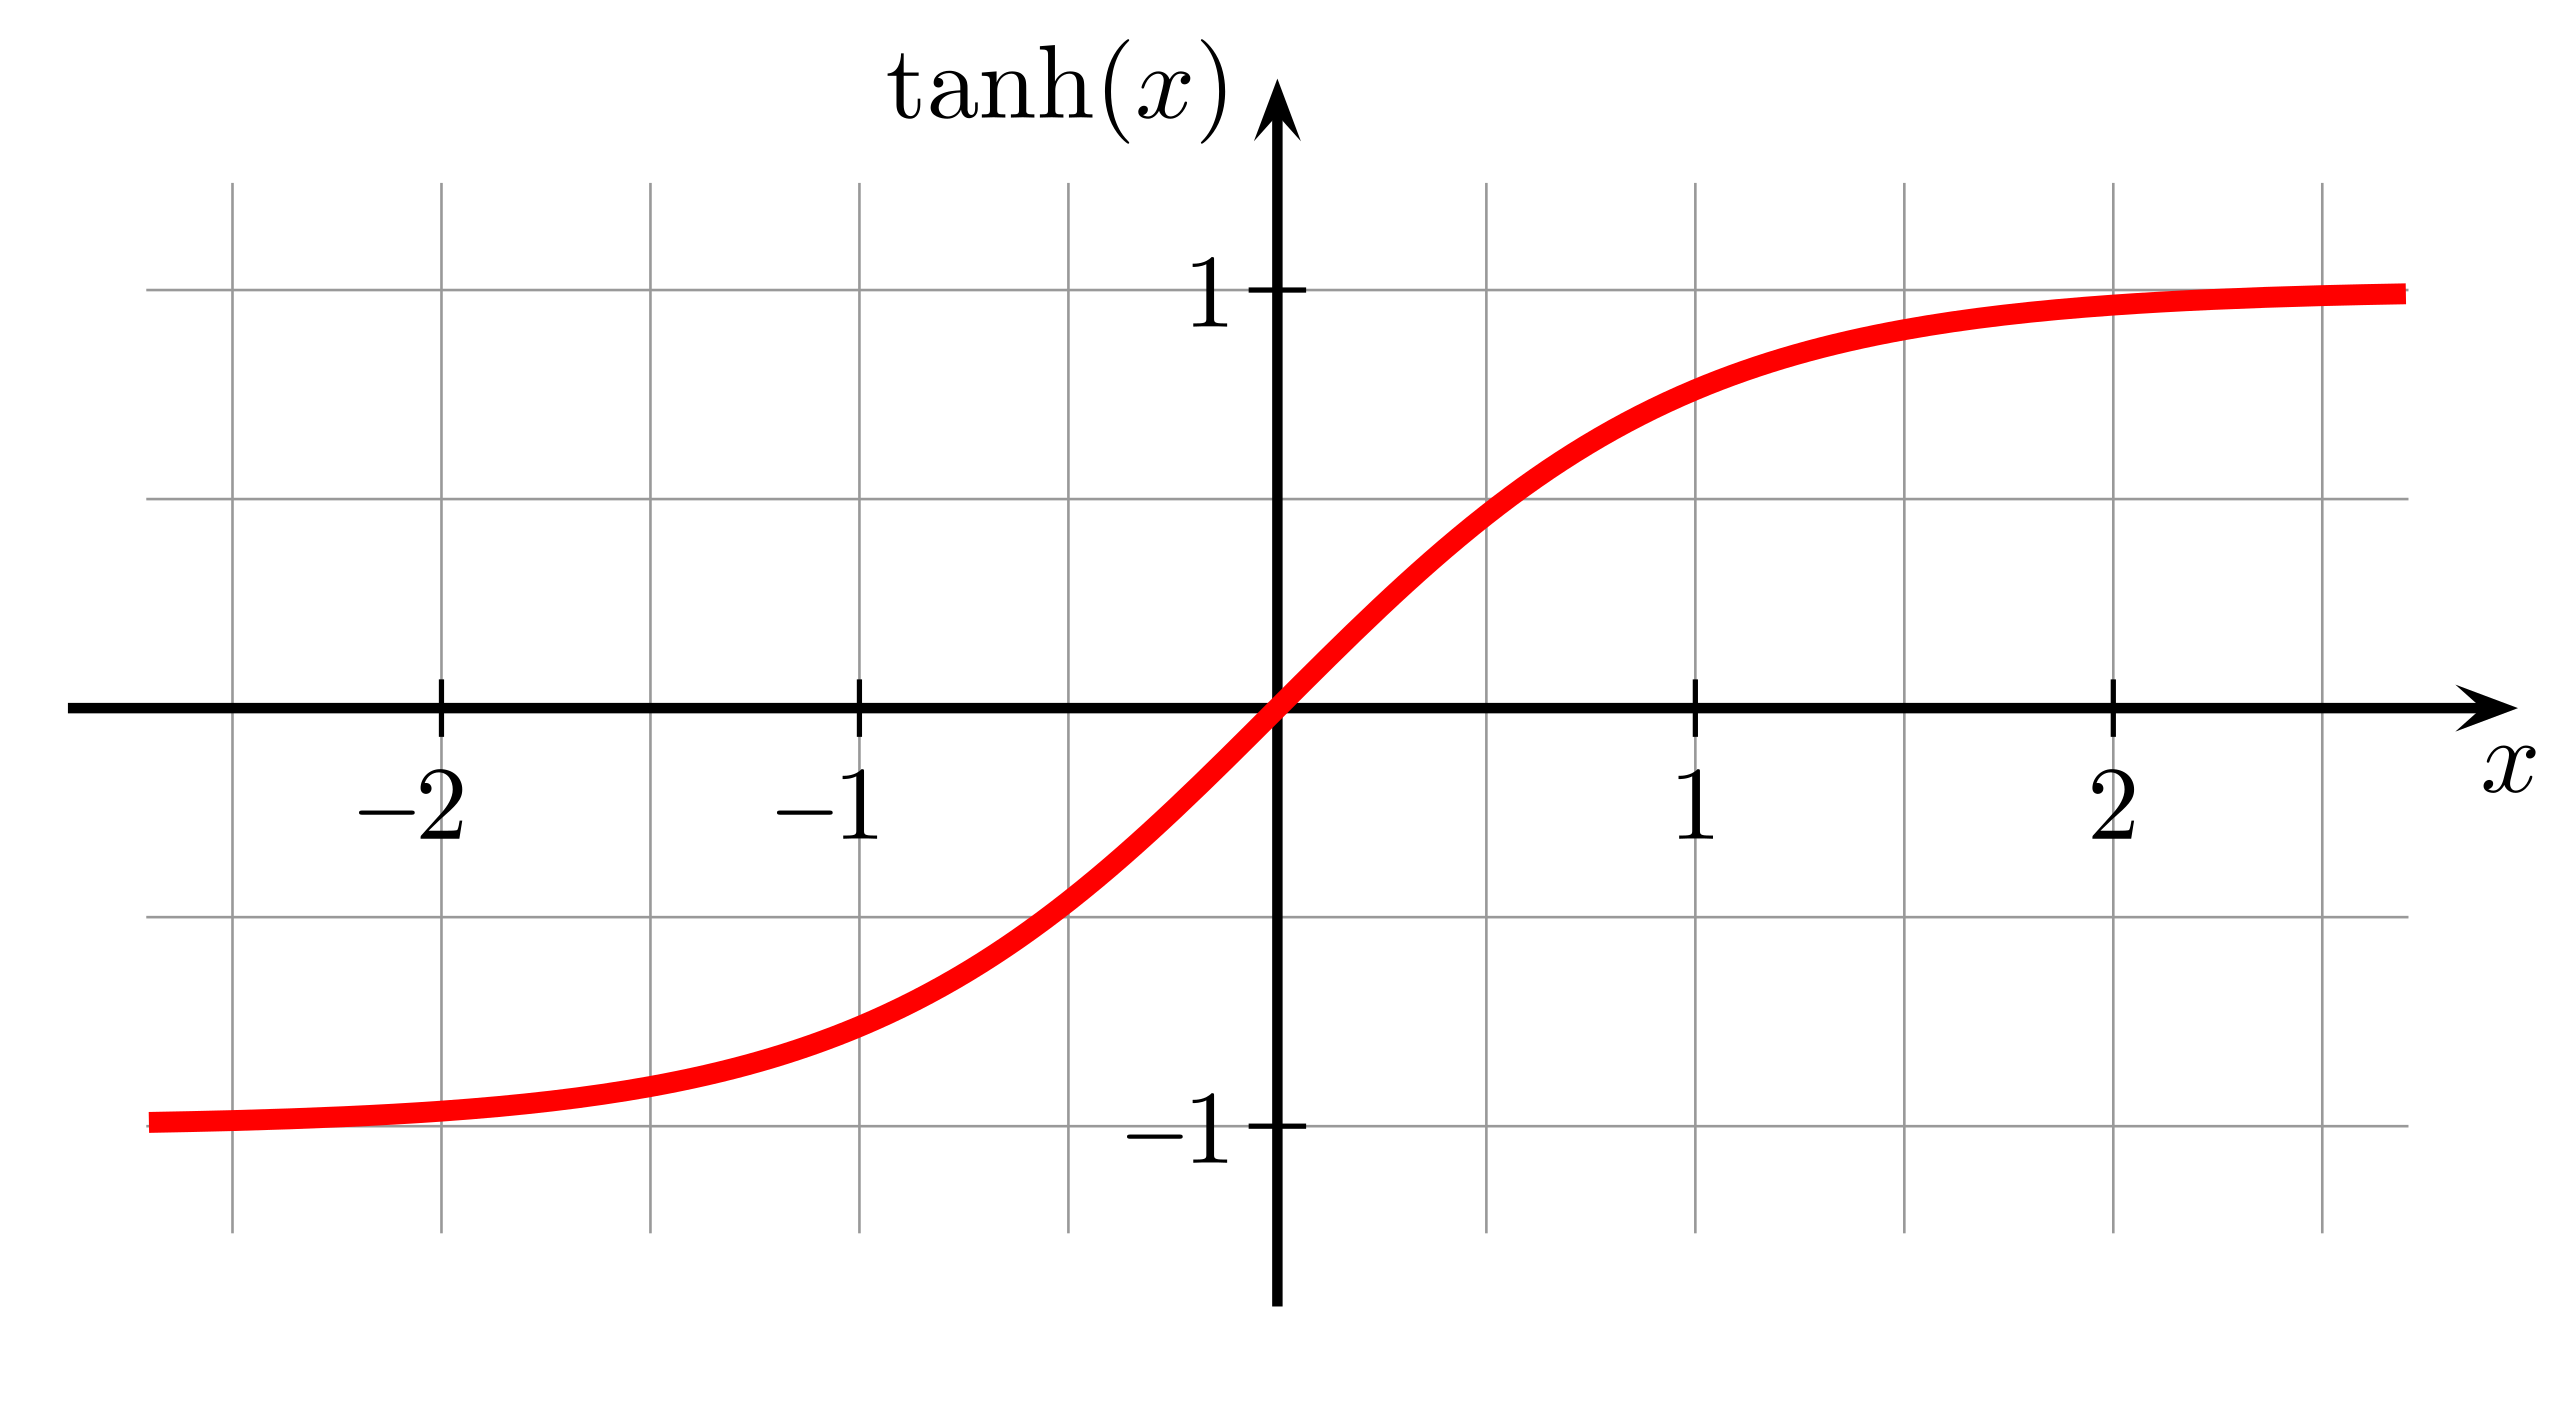

A Tangente hiperbólica (tanh) tem um formato em S, assim como a sigmoide, mas retorna um valor entre -1 e 1.

### Undersample

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)

import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.05184803381328234 
 Accuracy: 94.82%
Epoch  10 - Total error:  0.04956155011286749 
 Accuracy: 95.04%
Epoch  20 - Total error:  0.04956155011286749 
 Accuracy: 95.04%
Epoch  30 - Total error:  0.04956155011286748 
 Accuracy: 95.04%
Epoch  40 - Total error:  0.04956155011286748 
 Accuracy: 95.04%
Epoch  50 - Total error:  0.04956155011286748 
 Accuracy: 95.04%


O algoritmo atingiu um mínimo por volta de 10 épocas, atingindo acurácia de 95.26%

#### Normalizando

In [ ]:
for i in colunas:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [ ]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.05574302253400756 
 Accuracy: 94.43%
Epoch  10 - Total error:  0.04744696469100273 
 Accuracy: 95.26%
Epoch  20 - Total error:  0.04744696637272254 
 Accuracy: 95.26%
Epoch  30 - Total error:  0.04744696059707341 
 Accuracy: 95.26%
Epoch  40 - Total error:  0.047446946829099716 
 Accuracy: 95.26%
Epoch  50 - Total error:  0.047446924243312455 
 Accuracy: 95.26%


Conclui-se que houve aumento de acurácia normalizando os dados

#### Alterando learning rate

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.4,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.07496486830838045 
 Accuracy: 92.5%
Epoch  10 - Total error:  0.07496808069941804 
 Accuracy: 92.5%
Epoch  20 - Total error:  0.07468181176879984 
 Accuracy: 92.53%
Epoch  30 - Total error:  0.07468179445428919 
 Accuracy: 92.53%
Epoch  40 - Total error:  0.07468176991489521 
 Accuracy: 92.53%
Epoch  50 - Total error:  0.0746817314470394 
 Accuracy: 92.53%


Ao aumentar o learning rate, há perda de acurácia

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.01,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.04383150193086518 
 Accuracy: 95.62%
Epoch  10 - Total error:  0.03868466450450812 
 Accuracy: 96.13%
Epoch  20 - Total error:  0.03863418483893094 
 Accuracy: 96.14%
Epoch  30 - Total error:  0.03862010916893553 
 Accuracy: 96.14%
Epoch  40 - Total error:  0.038614156127468297 
 Accuracy: 96.14%
Epoch  50 - Total error:  0.03861099868222701 
 Accuracy: 96.14%


Ao diminuir o learning rate, também há perda de acurácia. Desta forma, conclui-se que um learning rate de 0.05 para este modelo obtém os melhores resultados.

#### Com oversample

In [17]:
from sklearn.utils import resample
# Separar a maioria e minoria
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]
# Downsample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=25000) # Colocar aqui o downsample que quiser

df_minority_oversampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=25000) 

# Combinar a maioria downsampled com a minoria
df = pd.concat([df_majority_downsampled, df_minority_oversampled])

In [19]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.01,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')

Epoch  1 - Total error:  0.04403819482089713 
 Accuracy: 95.6%
Epoch  10 - Total error:  0.017866598464672517 
 Accuracy: 98.21%
Epoch  20 - Total error:  0.01729188195368938 
 Accuracy: 98.27%
Epoch  30 - Total error:  0.017089348696857458 
 Accuracy: 98.29%
Epoch  40 - Total error:  0.016997910741309578 
 Accuracy: 98.3%
Epoch  50 - Total error:  0.01653393685169995 
 Accuracy: 98.35%


Observou-se ganho considerável de acurácia fazendo oversample, embora seja possível que isso se deva a um overfit. Infelizmente não foi possível verificar a ocorrência desse fenômeno pelo motivo explicado na Seção "NOTA", ao final do relatório.

## Aplicando o perceptron no tensorflow

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [29]:
from sklearn.utils import resample
# Separar a maioria e minoria
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]
# Downsample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=492) # Colocar aqui o downsample que quiser



# Combinar a maioria downsampled com a minoria
df = pd.concat([df_majority_downsampled, df_minority])

In [30]:
for i in colunas:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [31]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('Class')]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
model = Sequential([
    #Flatten(input_shape=(30, 30)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(30, activation='sigmoid'), # dense layer 1
    Dense(10, activation='sigmoid'), # dense layer 2
    Dense(2, activation='sigmoid'),  # dense layer 3
])

In [44]:
len(X_train)

787

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=50, batch_size=787, validation_split = 0.2)

Epoch 1/50
1/1 [==============================] - 1s 554ms/step - loss: 0.6995 - accuracy: 0.5008 - val_loss: 0.7006 - val_accuracy: 0.4873
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6982 - accuracy: 0.5008 - val_loss: 0.6990 - val_accuracy: 0.4873
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6970 - accuracy: 0.5008 - val_loss: 0.6977 - val_accuracy: 0.4873
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6961 - accuracy: 0.5008 - val_loss: 0.6965 - val_accuracy: 0.4873
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6952 - accuracy: 0.5008 - val_loss: 0.6955 - val_accuracy: 0.4873
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6946 - accuracy: 0.5008 - val_loss: 0.6947 - val_accuracy: 0.4873
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.6940 - accuracy: 0.5008 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==========

## MNIST

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [68]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Colocando os dados no intervalo de 0 a 1
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

Construindo a rede utilizando o modelo tf.keras.sequential disponível no keras.

Como trata-se de uma classificação multiclasse, decidi usar a função de ativação Softmax na última camada, a qual é a mais apropriada para este tipo de classificação.

Nas outras camadas, utilizei a função sigmoide.

In [56]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(256, activation='sigmoid'), # dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split = 0.2)

Epoch 1/10
24/24 [==============================] - 3s 131ms/step - loss: 0.2684 - accuracy: 0.9250 - val_loss: 0.2505 - val_accuracy: 0.9306
Epoch 2/10
24/24 [==============================] - 3s 113ms/step - loss: 0.2546 - accuracy: 0.9281 - val_loss: 0.2392 - val_accuracy: 0.9327
Epoch 3/10
24/24 [==============================] - 3s 110ms/step - loss: 0.2418 - accuracy: 0.9315 - val_loss: 0.2300 - val_accuracy: 0.9345
Epoch 4/10
24/24 [==============================] - 2s 91ms/step - loss: 0.2308 - accuracy: 0.9342 - val_loss: 0.2208 - val_accuracy: 0.9368
Epoch 5/10
24/24 [==============================] - 2s 89ms/step - loss: 0.2198 - accuracy: 0.9376 - val_loss: 0.2131 - val_accuracy: 0.9398
Epoch 6/10
24/24 [==============================] - 2s 87ms/step - loss: 0.2105 - accuracy: 0.9404 - val_loss: 0.2054 - val_accuracy: 0.9415
Epoch 7/10
24/24 [==============================] - 2s 87ms/step - loss: 0.2013 - accuracy: 0.9420 - val_loss: 0.1976 - val_accuracy: 0.9439
Epoch 8/10

Percebe-se aumento de acurácia, diminuição de loss, e aumento de acurácia de validação conforme as épocas rodam, o que indica bom funcionamento da rede neural.

In [63]:
# Separa os valores obtidos acima em variáveis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

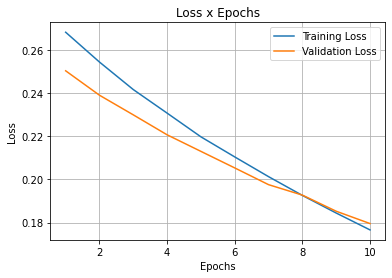

In [64]:
# Plot da curva com os valores de loss ao longo das épocas
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["Training Loss", "Validation Loss"])
plt.title('Loss x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

O que se espera do gráfico de uma função de custo é que seu valor diminua ao longo das épocas, significando que o modelo está aprendendo. Um valor baixo de loss pode também significar que o modelo está em Overfitting. Para averiguar essa situação, deve-se analisar os valores de validação.

Ambas as curvas devem decrescer com o tempo

#### Avaliando o modelo nos samples de teste

In [71]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.1829 - accuracy: 0.9462
Test loss: 0.18289338052272797
Test accuracy: 0.9462000131607056


Observa-se acurácia similar àquela obtida durante o treinamento, o que indica bom desempenho da rede neural, sem overfit ou underfit.

## Nota

Houve problema ao aplicar o modelo no conjunto de testes, visto que a iteração não funciona entre todas as samples no algoritmo. Após inúmeras revisões e tentativas de depuração printando passo a passo, não consegui identificar o motivo deste problema. Trata-se de algum bug na função predict dentro do objeto Perceptron.

As funções de ativação sempre têm o mesmo resultado independente da sample, mas não identifico nenhum problema nelas ao executar a função fit, dentro do objeto Perceptron.

Visto que as fórmulas de forward propagation são exatamente as mesmas para a função fit e para a função predict, não consegui observar o motivo deste problema nas funções de ativação.

## Conclusão

Conclui-se que o melhor resultado obtido pelo Perceptron programado ao início do relatório se deu com os dados normalizados, utilizando a função de ativação sigmoide, a um learning rate de 0.05 como exposto no código abaixo.

In [ ]:
dic = {'InputLayer':30, 'HiddenLayer':10, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.05,'BiasHiddenValue':np.random.rand(), 
              'BiasOutputValue':np.random.rand(), 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(X_train,y_train)


import warnings
warnings.filterwarnings('ignore')